### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.metrics import davies_bouldin_score

### Load dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Competition/Pekan IT 2022 - Data Mining/Pekan IT 2022/Jumlah Perjalanan Wisatawan Nusantara.csv')

df

,Provinsi,Jumlah Perjalanan Wisatawan Nusantara (Orang),Unnamed: 2,Unnamed: 3
0,NaN,2018.0,2019.0,2020.0
1,ACEH,6518831.0,25523219.0,4647806.0
2,SUMATERA UTARA,10345256.0,63576590.0,13045164.0
3,SUMATERA BARAT,6402187.0,19412170.0,6930832.0
4,RIAU,5552920.0,23132950.0,5203647.0
5,JAMBI,2242802.0,10721877.0,2300410.0
6,SUMATERA SELATAN,6137095.0,19380151.0,5466863.0
7,BENGKULU,2018556.0,6096569.0,1427427.0
8,LAMPUNG,6881006.0,17957376.0,7749577.0
9,KEP. BANGKA BELITUNG,5197635.0,4544157.0,847930.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Provinsi                                       38 non-null     object 
 1   Jumlah Perjalanan Wisatawan Nusantara (Orang)  36 non-null     float64
 2   Unnamed: 2                                     36 non-null     float64
 3   Unnamed: 3                                     36 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


### Pre-processing

In [ ]:
df_clean = df.copy()
df_clean.columns=['provinsi','2018','2019','2020']
df_clean = df_clean.dropna().reset_index(drop=True)
df_clean.drop(df_clean.index[-1], inplace=True)

df_clean

,provinsi,2018,2019,2020
0,ACEH,6518831.0,25523219.0,4647806.0
1,SUMATERA UTARA,10345256.0,63576590.0,13045164.0
2,SUMATERA BARAT,6402187.0,19412170.0,6930832.0
3,RIAU,5552920.0,23132950.0,5203647.0
4,JAMBI,2242802.0,10721877.0,2300410.0
5,SUMATERA SELATAN,6137095.0,19380151.0,5466863.0
6,BENGKULU,2018556.0,6096569.0,1427427.0
7,LAMPUNG,6881006.0,17957376.0,7749577.0
8,KEP. BANGKA BELITUNG,5197635.0,4544157.0,847930.0
9,KEP. RIAU,4611718.0,5121724.0,421559.0


In [ ]:
df_clean2 = df_clean.drop(columns='provinsi')
df_clean2 = df_clean2.astype(int)
df_clean2

,2018,2019,2020
0,6518831,25523219,4647806
1,10345256,63576590,13045164
2,6402187,19412170,6930832
3,5552920,23132950,5203647
4,2242802,10721877,2300410
5,6137095,19380151,5466863
6,2018556,6096569,1427427
7,6881006,17957376,7749577
8,5197635,4544157,847930
9,4611718,5121724,421559


In [ ]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2018    34 non-null     int64
 1   2019    34 non-null     int64
 2   2020    34 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [ ]:
# Convert dataset to array
X = np.asarray(df_clean2)

X

array([[  6518831,  25523219,   4647806],
       [ 10345256,  63576590,  13045164],
       [  6402187,  19412170,   6930832],
       [  5552920,  23132950,   5203647],
       [  2242802,  10721877,   2300410],
       [  6137095,  19380151,   5466863],
       [  2018556,   6096569,   1427427],
       [  6881006,  17957376,   7749577],
       [  5197635,   4544157,    847930],
       [  4611718,   5121724,    421559],
       [ 24967080,  57494172,  43920059],
       [ 53203387, 107451428,  90182229],
       [ 43110598,  59838282, 118122553],
       [  7858137,  16060595,  22319030],
       [ 53244287,  99579825, 125343705],
       [ 13275125,  30709360,  30090681],
       [  6621617,  13767578,   7818391],
       [  3192581,  11821213,   3470669],
       [  2947381,   9704623,   1889690],
       [  3257024,  10916751,   1678423],
       [  2745542,   7249983,   1410749],
       [  4520927,  14600304,   4350200],
       [  2613107,  15665704,   2236182],
       [   634477,   1908610,    2

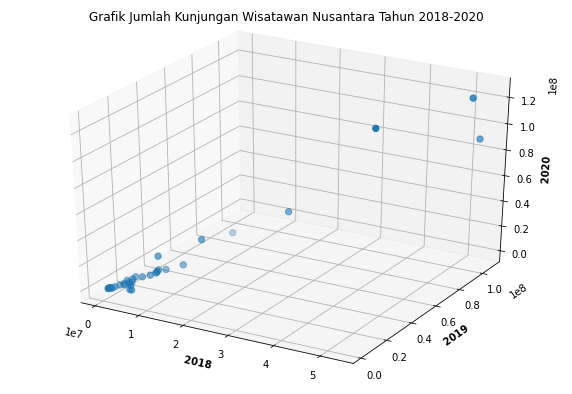

In [ ]:
# Import library for 3D Scatter Plot
from mpl_toolkits import mplot3d

# Define data
x = X[:,0]
y = X[:,1]
z = X[:,2]

# Create figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create plot
ax.scatter3D(x, y, z, s=40, label = 'True Position')
plt.title("Grafik Jumlah Kunjungan Wisatawan Nusantara Tahun 2018-2020", pad=17)
 
# Add axis
ax.set_xlabel(' 2018 ', fontweight ='bold')
ax.set_ylabel(' 2019 ', fontweight ='bold')
ax.set_zlabel(' 2020 ', fontweight ='bold')

# Show plot
plt.show()

### Modeling
K-Means Clustering

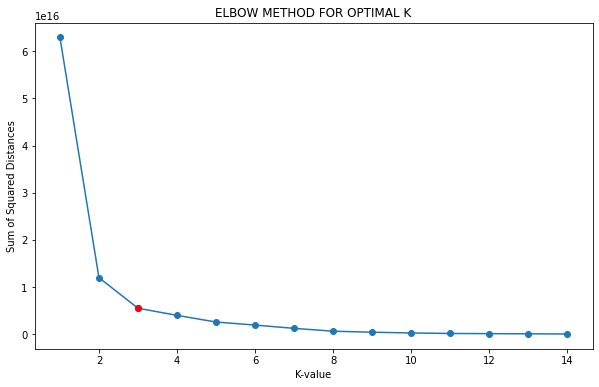

In [ ]:
# Create Scree Plot (Elbow)

sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X)
    sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], sum_of_squared_distances[2], 'ro')
plt.show()

In [ ]:
# Activate the K-Means algorithm to choose how many n_clusters based on the elbow method

kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Display the centroid value generated by the K-Means algorithm

print(kmeans.cluster_centers_)

[[3.75921982e+06 1.08396099e+07 3.49587757e+06]
 [4.98527573e+07 8.89565117e+07 1.11216162e+08]
 [1.61958203e+07 5.05933740e+07 2.90186347e+07]]


In [ ]:
centroid = kmeans.cluster_centers_

centroid.astype(int)

array([[  3759219,  10839609,   3495877],
       [ 49852757,  88956511, 111216162],
       [ 16195820,  50593374,  29018634]])

In [ ]:
# Checking labels

print(kmeans.labels_)

[0 2 0 0 0 0 0 0 0 0 2 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


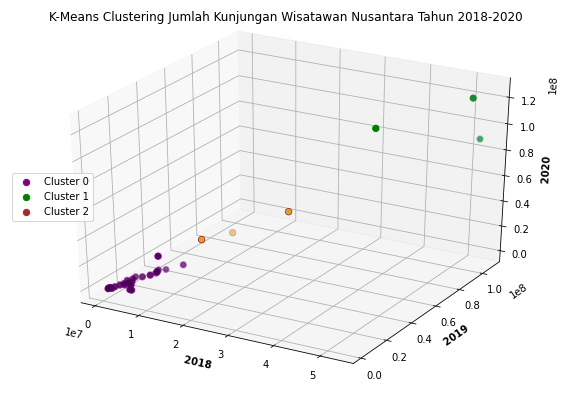

In [ ]:
# Visualization of clustering results

# Create figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create plot
ax.scatter3D(x, y, z, c=kmeans.labels_, cmap = 'viridis')
ax.scatter3D(X[kmeans.labels_ == 0,0], X[kmeans.labels_ == 0,1], X[kmeans.labels_ == 0,2], s=40, color='purple', label='Cluster 0')
ax.scatter3D(X[kmeans.labels_ == 1,0], X[kmeans.labels_ == 1,1], X[kmeans.labels_ == 1,2], s=40, color='green', label='Cluster 1')
ax.scatter3D(X[kmeans.labels_ == 2,0], X[kmeans.labels_ == 2,1], X[kmeans.labels_ == 2,2], s=40, color='brown', label='Cluster 2')
plt.title("K-Means Clustering Jumlah Kunjungan Wisatawan Nusantara Tahun 2018-2020", pad=17)
 
# Add axis
ax.set_xlabel(' 2018 ', fontweight ='bold')
ax.set_ylabel(' 2019 ', fontweight ='bold')
ax.set_zlabel(' 2020 ', fontweight ='bold')
ax.legend(loc='center left')

# Show plot
plt.show()

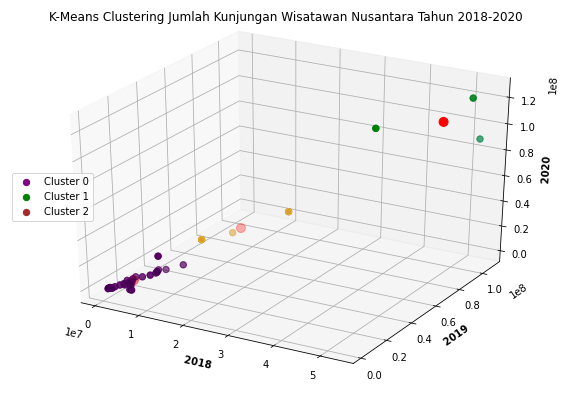

In [ ]:
# Display the centroid results in a graph

# Create figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create plot
ax.scatter3D(x, y, z, c=kmeans.labels_, cmap = 'viridis', s=40)
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=80, color='red')
ax.scatter3D(X[kmeans.labels_ == 0,0], X[kmeans.labels_ == 0,1], X[kmeans.labels_ == 0,2], s=40, color='purple', label='Cluster 0')
ax.scatter3D(X[kmeans.labels_ == 1,0], X[kmeans.labels_ == 1,1], X[kmeans.labels_ == 1,2], s=40, color='green', label='Cluster 1')
ax.scatter3D(X[kmeans.labels_ == 2,0], X[kmeans.labels_ == 2,1], X[kmeans.labels_ == 2,2], s=40, color='brown', label='Cluster 2')
plt.title("K-Means Clustering Jumlah Kunjungan Wisatawan Nusantara Tahun 2018-2020", pad=17)
 
# Add axis
ax.set_xlabel(' 2018 ', fontweight ='bold')
ax.set_ylabel(' 2019 ', fontweight ='bold')
ax.set_zlabel(' 2020 ', fontweight ='bold')
ax.legend(loc='center left')

# Show plot
plt.show()

In [ ]:
# Insert label results into a data frame

kmean_clustered = pd.DataFrame(X)
kmean_clustered.columns=['2018','2019','2020']
kmean_clustered['CLUSTER'] = pd.DataFrame(kmeans.labels_)

kmean_clustered

,2018,2019,2020,CLUSTER
0,6518831,25523219,4647806,0
1,10345256,63576590,13045164,2
2,6402187,19412170,6930832,0
3,5552920,23132950,5203647,0
4,2242802,10721877,2300410,0
5,6137095,19380151,5466863,0
6,2018556,6096569,1427427,0
7,6881006,17957376,7749577,0
8,5197635,4544157,847930,0
9,4611718,5121724,421559,0


In [ ]:
pd.concat([df_clean['provinsi'], kmean_clustered], axis=1).sort_values(by='CLUSTER')

,provinsi,2018,2019,2020,CLUSTER
0,ACEH,6518831,25523219,4647806,0
31,MALUKU UTARA,615624,2288358,438188,0
30,MALUKU,1206288,2981511,225290,0
29,SULAWESI BARAT,941944,2695402,690045,0
28,GORONTALO,938557,2589209,920208,0
27,SULAWESI TENGGARA,3370736,8720256,1873628,0
26,SULAWESI SELATAN,9616232,28446762,8828147,0
25,SULAWESI TENGAH,2260800,8259155,1334611,0
24,SULAWESI UTARA,4313069,6899359,2370027,0
23,KALIMANTAN UTARA,634477,1908610,202610,0


In [ ]:
print(f"Jumlah Kunjungan 2018 : {(kmean_clustered['2018']).sum()} kunjungan")
print(f"Jumlah Kunjungan 2019 : {(kmean_clustered['2019']).sum()} kunjungan")
print(f"Jumlah Kunjungan 2020 : {(kmean_clustered['2020']).sum()} kunjungan")

Jumlah Kunjungan 2018 : 303403888 kunjungan
Jumlah Kunjungan 2019 : 722158734 kunjungan
Jumlah Kunjungan 2020 : 518588963 kunjungan


### Evaluation

In [ ]:
# K-Means 
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Save the label
km_labels = davies_bouldin_score(X, kmeans.labels_)

print(f'K-Means Davies Bouldin Score : {km_labels}')

K-Means Davies Bouldin Score : 0.5350943563372056
